  # ELEKTROAUTOS


    Brand:           Manufacturer of the vehicle
    Model:           Model name
    AccelSec:        Acceleration as 0-100 km/h
    TopSpeed_KmH:    The top speed in km/h
    Rang_Km:         Reichweite in km
    Efficiency_WhKm: Efficiency Wh/km --> wie viel kw brauch ich pro km bzw. Stromverbrauch pro km
    FastCharge_KmH:  Charge km/h --> Reichweite in km nach einer Stunde Schnellladen (=theoretischer Wert)
    RapidCharge:     Yes / No --> besitzt Schnellladefunktion ja/nein
    PowerTrain:      Front (FWD), rear (RWD) , or all wheel drive (AWD)
    PlugType:        Plug type (Stecktyp Laden an Ladesäule; abhängig vom Land in dem das Auto späterfährt)
    BodyStyle:       Basic size or style (SUV, Schrägdach etc.)
    Seats:           Number of seats
    PriceEuro:       Price in Germany before tax incentives
    connector:       unique identifier für die Verbindung der Daten

## DATA PREPROCESSING

<font color='black'>**Importieren von benötigten Bibliotheken**</font>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

### Datensatz einlesen

In [2]:
df1 = pd.read_csv("ecar_part1.csv", engine='python', index_col=0)   

df1.head(5)  

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,100
1,Volkswagen,ID.3 Pure,10.0,160,270,167,101
2,Polestar,2,4.7,210,400,181,102
3,BMW,iX3,6.8,180,360,206,103
4,Honda,e,9.5,145,170,168,104


In [3]:
df2 = pd.read_csv("ecar_part2.csv", sep='|',engine='python', index_col=0)

df2.head(5)  

,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro,connector
0,940.0,Yes,AWD,Type 2 CCS,Sedan,5.0,55480,100
1,250.0,Yes,RWD,Type 2 CCS,Hatchback,?,30000,101
2,620.0,Yes,AWD,Type 2 CCS,Liftback,5.0,56440,102
3,560.0,Yes,RWD,Type 2 CCS,SUV,5.0,68040,103
4,190.0,Yes,RWD,Type 2 CCS,Hatchback,4.0,32997,104


### Zusammenführen von DataFrames

In [4]:
# check länge der daten 

len(df1) == len(df2)

# --> gleich lang

True

<font color='red'>Beide Datensätze enthalten die gleiche Anzahl der Zeilen und ergänzen einander. Daher werden die Datensätze über die Spalten zusammengefügt. Man kann hier die Spalte **"connector"** als key verwenden.</font>


In [5]:
df_autos = df1.merge(df2, on='connector')
df_autos

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,100,940.0,Yes,AWD,Type 2 CCS,Sedan,5.0,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,101,250.0,Yes,RWD,Type 2 CCS,Hatchback,?,30000
2,Polestar,2,4.7,210,400,181,102,620.0,Yes,AWD,Type 2 CCS,Liftback,5.0,56440
3,BMW,iX3,6.8,180,360,206,103,560.0,Yes,RWD,Type 2 CCS,SUV,5.0,68040
4,Honda,e,9.5,145,170,168,104,190.0,Yes,RWD,Type 2 CCS,Hatchback,4.0,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,198,440.0,Yes,FWD,Type 2 CCS,Hatchback,5.0,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,199,540.0,Yes,AWD,Type 2 CCS,SUV,?,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,200,440.0,Yes,AWD,missing_type,Hatchback,5.0,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,201,450.0,Yes,AWD,Type 2 CCS,Hatchback,5.0,65000


In [6]:
# check, ob merge erfolgreich

len(df_autos) == len(df1)

True

### Overview

In [7]:
df_autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   connector        103 non-null    int64  
 7   FastCharge_KmH   98 non-null     float64
 8   RapidCharge      103 non-null    object 
 9   PowerTrain       103 non-null    object 
 10  PlugType         103 non-null    object 
 11  BodyStyle        103 non-null    object 
 12  Seats            103 non-null    object 
 13  PriceEuro        103 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 12.1+ KB


In [8]:
df_autos.shape

(103, 14)

In [9]:
df_autos.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,98.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,151.000000,456.734694,55811.563107
std,3.017430,43.573030,126.014444,29.566839,29.877528,201.262897,34134.665280
min,2.100000,123.000000,95.000000,104.000000,100.000000,170.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,125.500000,275.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,151.000000,440.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,176.500000,560.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,202.000000,940.000000,215000.000000


<font color='red'>Eindeutige Werte in den Spalten</font>

In [10]:
for i in df_autos:
    print(df_autos[i].unique())

['Tesla ' 'Volkswagen ' 'Polestar ' 'BMW ' 'Honda ' 'Lucid ' 'Peugeot '
 'Audi ' 'Mercedes ' 'Nissan ' 'Hyundai ' 'Porsche ' 'MG ' 'Mini ' 'Opel '
 'Skoda ' 'Volvo ' 'Kia ' 'Renault ' 'Mazda ' 'Lexus ' 'CUPRA ' 'SEAT '
 'Lightyear ' 'Aiways ' 'DS ' 'Citroen ' 'Jaguar ' 'Ford ' 'Byton '
 'Sono ' 'Smart ' 'Fiat ']
['Model 3 Long Range Dual Motor' 'ID.3 Pure' '2' 'iX3 ' 'e ' 'Air '
 'e-Golf ' 'e-208 ' 'Model 3 Standard Range Plus' 'Q4 e-tron '
 'EQC 400 4MATIC' 'Leaf ' 'Kona Electric 64 kWh' 'i4 ' 'IONIQ Electric'
 'ID.3 Pro S' 'Taycan Turbo S' 'e-Up! ' 'ZS EV' 'Cooper SE ' 'Corsa-e '
 'Model Y Long Range Dual Motor' 'Enyaq iV 50' 'e-tron GT '
 'Model 3 Long Range Performance' 'ID.4 ' 'ID.3 Pro'
 'XC40 P8 AWD Recharge' 'i3 120 Ah' 'e-2008 SUV ' 'e-tron 50 quattro'
 'e-Niro 64 kWh' 'Zoe ZE50 R110' 'Cybertruck Tri Motor' 'MX-30 ' 'Leaf e+'
 'UX 300e' 'el-Born ' 'Zoe ZE50 R135' 'EQA ' 'Model S Long Range'
 'Kona Electric 39 kWh' 'e-tron Sportback 55 quattro' 'CITIGOe iV '
 'Mii Electric ' 'e

<font color='red'>Was fällt in den Spalten auf? </font>

        "missing_type"     =>    PlugType
        "?"                =>    Seats
        Leerzeichen        =>    Brand 

### Fehlende Werte

In [11]:
def null_values(x):
    a = x.isnull().sum()
    b = 100 * x.isnull().sum()/x.shape[0]
    nv = pd.concat([a, round(b,2)], axis=1).rename(columns={0:'Missing_Values', 1:'Percentage (%)'})
    return nv[nv.Missing_Values>0].sort_values('Missing_Values', ascending=False)

In [12]:
null_values(df_autos)

,Missing_Values,Percentage (%)
FastCharge_KmH,5,4.85


#### FastCharge_KmH

In [13]:
df_autos["FastCharge_KmH"].value_counts().head(5)

230.0    6
540.0    5
440.0    5
380.0    5
560.0    4
Name: FastCharge_KmH, dtype: int64

In [14]:
df_autos[df_autos["FastCharge_KmH"].isnull()]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
57,Renault,Twingo ZE,12.6,135,130,164,157,NaN,No,RWD,Type 2,Hatchback,4.0,24790
68,Renault,Kangoo Maxi ZE 33,22.4,130,160,194,168,NaN,No,FWD,Type 2,SPV,5.0,38000
77,Smart,EQ forfour,12.7,130,95,176,177,NaN,No,RWD,Type 2,Hatchback,?,22030
82,Smart,EQ fortwo coupe,11.6,130,100,167,182,NaN,No,RWD,Type 2,Hatchback,2.0,21387
91,Smart,EQ fortwo cabrio,11.9,130,95,176,191,NaN,No,RWD,Type 2,Cabrio,2.0,24565


<font color='red'>**"Wir haben festgestellt, dass "RapidCharge" auch "Nein" ist, wenn "FastCharge_KmH" null ist. </font>

In [15]:
df_autos.groupby("RapidCharge").agg({"FastCharge_KmH":"size"})

,FastCharge_KmH
RapidCharge,
No,5
Yes,98


In [16]:
# alternativ

pd.crosstab(df_autos['RapidCharge'], df_autos['FastCharge_KmH'].isnull())

FastCharge_KmH,False,True
RapidCharge,,
No,0,5
Yes,98,0


<font color='red'>"Wir füllen die fehlenden Werte in der Spalte **"Fast Charge KmH"** mit **"0"** auf </font>

In [17]:
df_autos["FastCharge_KmH"].fillna(0,inplace=True)

In [18]:
df_autos["FastCharge_KmH"].value_counts().head(5)

230.0    6
540.0    5
0.0      5
380.0    5
440.0    5
Name: FastCharge_KmH, dtype: int64

#### Seats

<font color='red'>Seats hängt mit bodysteyle zusammen </font>

In [19]:
mask  = df_autos["Seats"]=='?'
list_bs_un = pd.unique(df_autos.loc[mask,"BodyStyle"])
list_bs_un

array(['Hatchback', 'Sedan', 'SUV'], dtype=object)

In [20]:
df_autos.loc[mask,["Seats","BodyStyle"]].head(5)

,Seats,BodyStyle
1,?,Hatchback
8,?,Sedan
20,?,Hatchback
31,?,SUV
36,?,SUV


<font color='red'>wir füllen die Fehlende Werte in der Spalte **"Seats"** mit der häufig verwendete Werte der bodystyle auf.</font>

In [21]:
for i in list_bs_un:
    tMask  = df_autos.BodyStyle ==i
    df_autos.loc[tMask,"Seats"] = df_autos.loc[tMask,"Seats"].value_counts().idxmax()
pd.unique(df_autos.Seats)

array(['4.0', '5.0', '6.0', '7.0', '2.0'], dtype=object)

#### "PlugType"

In [22]:
df_autos["PlugType"].unique()

array(['Type 2 CCS', 'missing_type', 'Type 2 CHAdeMO', 'Type 2',
       'Type 1 CHAdeMO'], dtype=object)

In [23]:
df_autos.loc[df_autos["PlugType"]=="missing_type",:].groupby("RapidCharge").agg(Anzahl=("RapidCharge","size"))

,Anzahl
RapidCharge,
Yes,15


<span style='color:red'> Alle Autos, die "missing_type" haben, sind RapidCharge</span>

In [24]:
mask3 = df_autos["PlugType"]=="missing_type" 
mask3

0      False
1      False
2      False
3      False
4      False
       ...  
98     False
99     False
100     True
101    False
102     True
Name: PlugType, Length: 103, dtype: bool

In [25]:
mode_plugtype = df_autos["PlugType"].value_counts().idxmax()
mode_plugtype

'Type 2 CCS'

In [26]:
types = df_autos.loc[(df_autos['Seats']=='?'), 'BodyStyle'].unique()

frequencies = []

for element in types:
    frequence = df_autos.loc[(df_autos['BodyStyle']==element), 'Seats'].value_counts().idxmax()
    frequencies.append((element,frequence))

In [27]:
pd.crosstab(df_autos['Seats'],df_autos['BodyStyle'])

BodyStyle,Cabrio,Hatchback,Liftback,MPV,Pickup,SPV,SUV,Sedan,Station
Seats,,,,,,,,,
2.0,1,0,0,0,0,0,0,0,0
4.0,2,0,0,0,0,0,0,10,1
5.0,0,32,5,1,0,1,45,0,0
6.0,0,0,0,0,3,0,0,0,0
7.0,0,0,0,0,0,2,0,0,0


<span style='color:red'> Wir füllen "missing_type" in der Spalte "PlugType" mit **Mode** auf.</span>

In [28]:
df_autos["PlugType"].replace({"missing_type":mode_plugtype}, inplace=True)

#### Leerzeichen

In [29]:
print(df_autos["Brand"].unique())
print(df_autos["Model"].unique())

['Tesla ' 'Volkswagen ' 'Polestar ' 'BMW ' 'Honda ' 'Lucid ' 'Peugeot '
 'Audi ' 'Mercedes ' 'Nissan ' 'Hyundai ' 'Porsche ' 'MG ' 'Mini ' 'Opel '
 'Skoda ' 'Volvo ' 'Kia ' 'Renault ' 'Mazda ' 'Lexus ' 'CUPRA ' 'SEAT '
 'Lightyear ' 'Aiways ' 'DS ' 'Citroen ' 'Jaguar ' 'Ford ' 'Byton '
 'Sono ' 'Smart ' 'Fiat ']
['Model 3 Long Range Dual Motor' 'ID.3 Pure' '2' 'iX3 ' 'e ' 'Air '
 'e-Golf ' 'e-208 ' 'Model 3 Standard Range Plus' 'Q4 e-tron '
 'EQC 400 4MATIC' 'Leaf ' 'Kona Electric 64 kWh' 'i4 ' 'IONIQ Electric'
 'ID.3 Pro S' 'Taycan Turbo S' 'e-Up! ' 'ZS EV' 'Cooper SE ' 'Corsa-e '
 'Model Y Long Range Dual Motor' 'Enyaq iV 50' 'e-tron GT '
 'Model 3 Long Range Performance' 'ID.4 ' 'ID.3 Pro'
 'XC40 P8 AWD Recharge' 'i3 120 Ah' 'e-2008 SUV ' 'e-tron 50 quattro'
 'e-Niro 64 kWh' 'Zoe ZE50 R110' 'Cybertruck Tri Motor' 'MX-30 ' 'Leaf e+'
 'UX 300e' 'el-Born ' 'Zoe ZE50 R135' 'EQA ' 'Model S Long Range'
 'Kona Electric 39 kWh' 'e-tron Sportback 55 quattro' 'CITIGOe iV '
 'Mii Electric ' 'e

<font color='red'>Wir haben festgestellt, dass die Zeilen in den Spalten **"Brand"** und **"Model"**Leerzeichen enthalten. Jetzt löschen wir diese Leerzeichen</font>

In [30]:
df_autos["Brand"] = df_autos["Brand"].str.lstrip(" ").str.rstrip(" ")
df_autos["Model"] = df_autos["Model"].str.lstrip(" ").str.rstrip(" ")

#### Duplicate Finden

In [31]:
df_autos['Model'].nunique() 

102

<font color='red'>103 Zeilen, aber 102 Modelle. </font>

In [32]:
df_autos.loc[df_autos['Model'].duplicated()==True,:]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
92,Kia,e-Soul 64 kWh,7.9,167,365,175,192,320.0,Yes,FWD,Type 2 CCS,SUV,5.0,36837


In [33]:
df_autos.loc[df_autos['Model'].duplicated()==True,:]

# das Model e_Soul 64 kWh ist doppelt enthalten --> check, was sich unterscheidet

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
92,Kia,e-Soul 64 kWh,7.9,167,365,175,192,320.0,Yes,FWD,Type 2 CCS,SUV,5.0,36837


In [34]:
df_autos.loc[df_autos['Model']=='e-Soul 64 kWh',:]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro
45,Kia,e-Soul 64 kWh,7.9,167,365,175,145,340.0,Yes,FWD,Type 2 CCS,SUV,5.0,36837
92,Kia,e-Soul 64 kWh,7.9,167,365,175,192,320.0,Yes,FWD,Type 2 CCS,SUV,5.0,36837


<font color='red'>Die beiden aufgelisteten Modell unterscheiden sich im FastCharge_KmH minimal. Daher scheint es ein tatsächliches Duplikat zu sein. Ich lösche diejenige Zeile bei der wir kürzer fahren können nach 1h Schnellladen und resette den Index.</font>

In [35]:
df_autos.drop(index=92, inplace=True)

In [36]:
df_autos.reset_index(inplace=True)

### Ausreißer

In [37]:
df_autos.describe()

,index,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,PriceEuro
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,50.598039,7.391176,179.313725,338.529412,189.303922,150.598039,435.686275,55997.588235
std,29.743877,3.031913,43.771228,126.609613,29.679072,29.743877,220.447384,34250.724403
min,0.000000,2.100000,123.000000,95.000000,104.000000,100.000000,0.000000,20129.000000
25%,25.250000,5.100000,150.000000,250.000000,168.000000,125.250000,260.000000,34414.750000
50%,50.500000,7.300000,160.000000,340.000000,180.500000,150.500000,440.000000,45000.000000
75%,75.750000,9.000000,200.000000,400.000000,204.500000,175.750000,557.500000,65000.000000
max,102.000000,22.400000,410.000000,970.000000,273.000000,202.000000,940.000000,215000.000000


<span style='color:red'> Aus der Tabelle ist ersichtlich, dass Standartabweichung von **"PriceEuro"** sehr groß ist.</span>

In [38]:
columns_numeric = ['AccelSec','TopSpeed_KmH', 'Range_Km','Efficiency_WhKm', 'connector', 'FastCharge_KmH','PriceEuro']

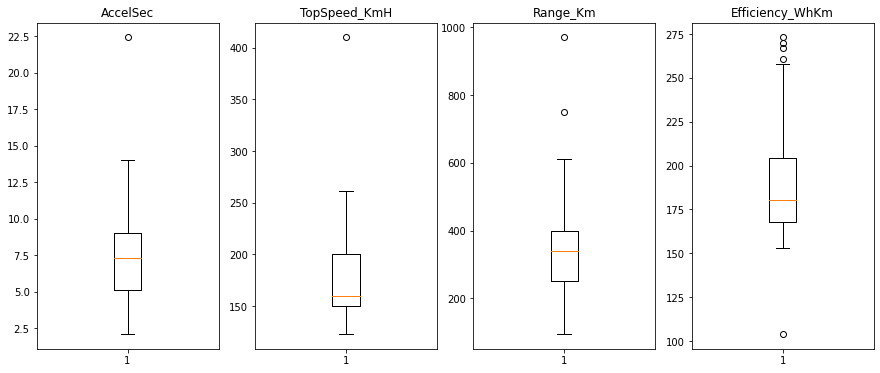

In [39]:
plt.figure(figsize=(15,6))

plt.subplot(141)
plt.boxplot(df_autos.AccelSec)
plt.gca().title.set_text("AccelSec")

plt.subplot(142)
plt.boxplot(df_autos.TopSpeed_KmH)
plt.gca().title.set_text("TopSpeed_KmH")

plt.subplot(143)
plt.boxplot(df_autos.Range_Km)
plt.gca().title.set_text("Range_Km")

plt.subplot(144)
plt.boxplot(df_autos.Efficiency_WhKm)
plt.gca().title.set_text("Efficiency_WhKm")

plt.show()


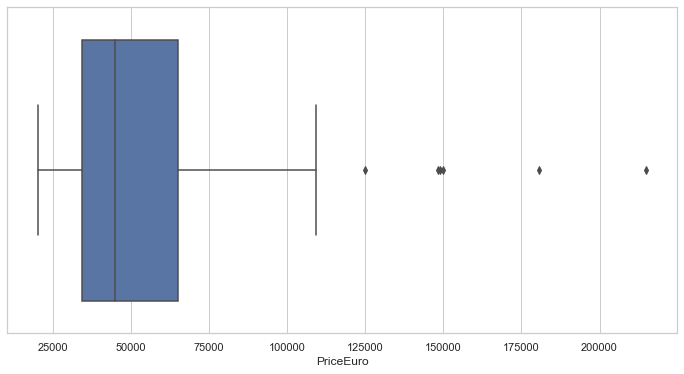

In [40]:
plt.figure(figsize=(12,6))

sns.set_theme(style="whitegrid")

ax = sns.boxplot(x=df_autos["PriceEuro"])


### Pairplot - erste visuelle Inspektion

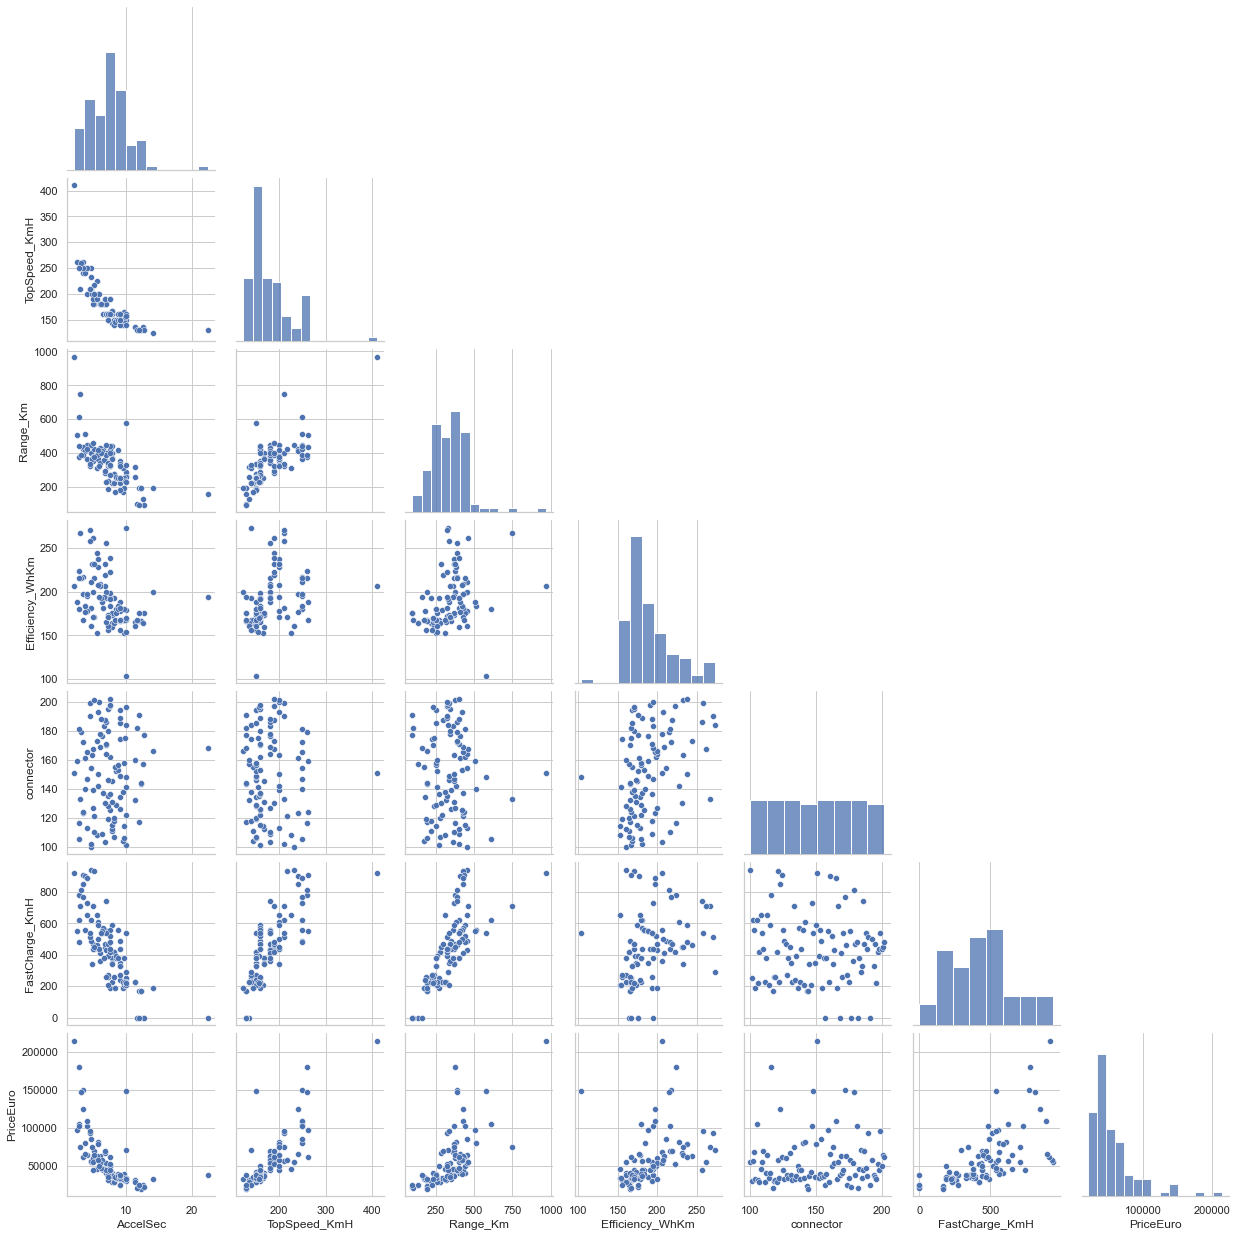

In [41]:
sns.pairplot(df_autos[columns_numeric],palette="husl",corner=True)

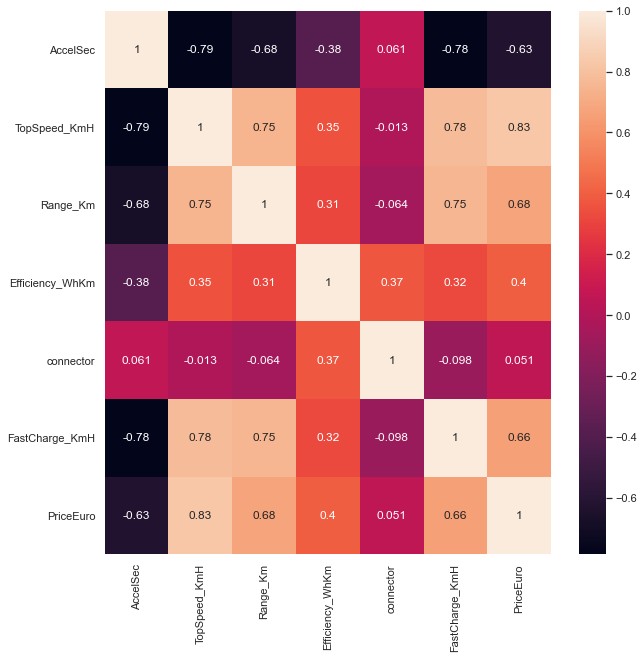

In [42]:
corr_df =df_autos[columns_numeric].corr(method='pearson')

plt.figure(figsize=(10,10))
sns.heatmap(corr_df, annot=True)
plt.show()

### FEATURE ENGINEERING

#### Feature 1: Wie viele Minuten dauert, das Auto vollständig aufzuladen?

<span style='color:blue'> Berechnung :         \
                **Full_charge_minute = (RangeKm/FasChargeKmH)*60**             </span>

In [43]:
yes_charging = df_autos["RapidCharge"]=='Yes'

In [44]:
df_autos["Full_charge_minute"] = round(df_autos.loc[yes_charging,"Range_Km"]/df_autos.loc[yes_charging,"FastCharge_KmH"]*60)
df_autos["Full_charge_minute"]

0      29.0
1      65.0
2      39.0
3      39.0
4      54.0
       ... 
97     45.0
98     37.0
99     44.0
100    50.0
101    50.0
Name: Full_charge_minute, Length: 102, dtype: float64

<span style='color:red'>10 Fahrzeuge mit der niedrigsten Vollladezeit</span>

In [45]:
df_autos[["Brand","Model","Range_Km","Full_charge_minute"]].sort_values(by="Full_charge_minute", ascending=True).head(10)

,Brand,Model,Range_Km,Full_charge_minute
61,Tesla,Model Y Long Range Performance,410,27.0
21,Tesla,Model Y Long Range Dual Motor,425,27.0
0,Tesla,Model 3 Long Range Dual Motor,450,29.0
65,Porsche,Taycan 4S Plus,425,29.0
79,Porsche,Taycan Turbo,390,29.0
8,Tesla,Model 3 Standard Range Plus,310,29.0
24,Tesla,Model 3 Long Range Performance,435,29.0
16,Porsche,Taycan Turbo S,375,29.0
47,Porsche,Taycan 4S,365,30.0
72,Porsche,Taycan Cross Turismo,385,30.0


#### Feature 2: Wie viele Minuten dauert, das Auto  aufzuladen, um 100 km zu fahren?

<span style='color:blue'> Berechnung :         \
                **charging_100km = (Full_charge_minute/RangeKm)*100**             </span>

In [46]:
df_autos.head(5)

,index,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro,Full_charge_minute
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,100,940.0,Yes,AWD,Type 2 CCS,Sedan,4.0,55480,29.0
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,101,250.0,Yes,RWD,Type 2 CCS,Hatchback,5.0,30000,65.0
2,2,Polestar,2,4.7,210,400,181,102,620.0,Yes,AWD,Type 2 CCS,Liftback,5.0,56440,39.0
3,3,BMW,iX3,6.8,180,360,206,103,560.0,Yes,RWD,Type 2 CCS,SUV,5.0,68040,39.0
4,4,Honda,e,9.5,145,170,168,104,190.0,Yes,RWD,Type 2 CCS,Hatchback,5.0,32997,54.0


In [47]:
yes_charging = df_autos["RapidCharge"]=='Yes'

In [48]:
df_autos["charging_100km"] = round((df_autos.loc[yes_charging,:].Full_charge_minute)/(df_autos["Range_Km"])*100,1)
df_autos["charging_100km"]

0       6.4
1      24.1
2       9.8
3      10.8
4      31.8
       ... 
97     13.6
98     11.0
99     13.5
100    13.3
101    12.5
Name: charging_100km, Length: 102, dtype: float64

<span style='color:red'>10 Fahrzeuge mit kürzester Ladezeit pro 100 km</span>

In [49]:
df_autos[["Brand","Model","Full_charge_minute","charging_100km"]].sort_values(by="charging_100km", ascending=True).head(10)

,Brand,Model,Full_charge_minute,charging_100km
0,Tesla,Model 3 Long Range Dual Motor,29.0,6.4
21,Tesla,Model Y Long Range Dual Motor,27.0,6.4
51,Tesla,Roadster,63.0,6.5
61,Tesla,Model Y Long Range Performance,27.0,6.6
24,Tesla,Model 3 Long Range Performance,29.0,6.7
65,Porsche,Taycan 4S Plus,29.0,6.8
23,Audi,e-tron GT,30.0,7.1
79,Porsche,Taycan Turbo,29.0,7.4
16,Porsche,Taycan Turbo S,29.0,7.7
72,Porsche,Taycan Cross Turismo,30.0,7.8


#### Feature 3: Kilowattberbrauch pro 100 km

In [50]:
df_autos.columns

Index(['index', 'Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'connector', 'FastCharge_KmH', 'RapidCharge',
       'PowerTrain', 'PlugType', 'BodyStyle', 'Seats', 'PriceEuro',
       'Full_charge_minute', 'charging_100km'],
      dtype='object')

In [51]:
df_autos["Efficiency_kWh_100km"] = df_autos.loc[yes_charging,"Efficiency_WhKm"]*100/1000
df_autos

,index,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro,Full_charge_minute,charging_100km,Efficiency_kWh_100km
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,100,940.0,Yes,AWD,Type 2 CCS,Sedan,4.0,55480,29.0,6.4,16.1
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,101,250.0,Yes,RWD,Type 2 CCS,Hatchback,5.0,30000,65.0,24.1,16.7
2,2,Polestar,2,4.7,210,400,181,102,620.0,Yes,AWD,Type 2 CCS,Liftback,5.0,56440,39.0,9.8,18.1
3,3,BMW,iX3,6.8,180,360,206,103,560.0,Yes,RWD,Type 2 CCS,SUV,5.0,68040,39.0,10.8,20.6
4,4,Honda,e,9.5,145,170,168,104,190.0,Yes,RWD,Type 2 CCS,Hatchback,5.0,32997,54.0,31.8,16.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,Nissan,Ariya 63kWh,7.5,160,330,191,198,440.0,Yes,FWD,Type 2 CCS,Hatchback,5.0,45000,45.0,13.6,19.1
98,99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,199,540.0,Yes,AWD,Type 2 CCS,SUV,5.0,96050,37.0,11.0,25.8
99,100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,200,440.0,Yes,AWD,Type 2 CCS,Hatchback,5.0,50000,44.0,13.5,19.4
100,101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,201,450.0,Yes,AWD,Type 2 CCS,Hatchback,5.0,65000,50.0,13.3,23.2


In [52]:
df_autos[["Brand","Model","Full_charge_minute","charging_100km","Efficiency_kWh_100km"]].sort_values(by="Efficiency_kWh_100km", ascending=True).head(10)

,Brand,Model,Full_charge_minute,charging_100km,Efficiency_kWh_100km
48,Lightyear,One,64.0,11.1,10.4
14,Hyundai,IONIQ Electric,71.0,28.4,15.3
8,Tesla,Model 3 Standard Range Plus,29.0,9.4,15.3
41,Hyundai,Kona Electric 39 kWh,73.0,28.6,15.4
74,Sono,Sion,50.0,22.2,15.6
19,Mini,Cooper SE,43.0,23.2,15.6
12,Hyundai,Kona Electric 64 kWh,63.0,15.8,16.0
60,Renault,Zoe ZE40 R110,67.0,26.3,16.1
28,BMW,i3 120 Ah,52.0,22.1,16.1
0,Tesla,Model 3 Long Range Dual Motor,29.0,6.4,16.1


#### Feature 4: Kategorisierung nach Price Euro

In [53]:
kategorie = ["billig", "normal","teuer", "sehr teuer"]

max = df_autos["PriceEuro"].max()
percentile_25 = np.percentile(df_autos["PriceEuro"],25)
percentile_50 = np.percentile(df_autos["PriceEuro"],50)
percentile_75 = np.percentile(df_autos["PriceEuro"],75)

x = percentile_75 + 1.5 * (percentile_75-percentile_25)

bins = [0, percentile_25, percentile_50, x, max]

df_autos["PriceCat"] = pd.cut(df_autos["PriceEuro"], bins=bins, labels=kategorie)

In [54]:
df_autos.head(5)

,index,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro,Full_charge_minute,charging_100km,Efficiency_kWh_100km,PriceCat
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,100,940.0,Yes,AWD,Type 2 CCS,Sedan,4.0,55480,29.0,6.4,16.1,teuer
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,101,250.0,Yes,RWD,Type 2 CCS,Hatchback,5.0,30000,65.0,24.1,16.7,billig
2,2,Polestar,2,4.7,210,400,181,102,620.0,Yes,AWD,Type 2 CCS,Liftback,5.0,56440,39.0,9.8,18.1,teuer
3,3,BMW,iX3,6.8,180,360,206,103,560.0,Yes,RWD,Type 2 CCS,SUV,5.0,68040,39.0,10.8,20.6,teuer
4,4,Honda,e,9.5,145,170,168,104,190.0,Yes,RWD,Type 2 CCS,Hatchback,5.0,32997,54.0,31.8,16.8,billig


In [55]:
df_autos.groupby(["Brand","PriceCat"], as_index=True).agg({"Efficiency_WhKm":"size", "charging_100km":"size"})

Efficiency_WhKm  charging_100km
Brand      PriceCat                                   
Aiways     billig                    0               0
           normal                    1               1
           teuer                     0               0
           sehr teuer                0               0
Audi       billig                    0               0
...                                ...             ...
Volkswagen sehr teuer                0               0
Volvo      billig                    0               0
           normal                    0               0
           teuer                     1               1
           sehr teuer                0               0

[132 rows x 2 columns]

### Speicherplatz

Datentypen anpassen, um diese in der visualisierung auch geplottet zu bekommen ( bsp. seats ist aktuell string --> int; FastCharge_kmh --> int)

In [56]:
# umwandlung von object in den int

# wir können ein object nicht direkt als int umwandeln  -->
# erst umwandeln in float und danach vom float zu int
# da astype kein inplace hat, müssen wir über die Wertzuweisung den Datentyp ändern

df_autos['Seats'] = df_autos['Seats'].astype('float')
df_autos.dtypes 

index                      int64
Brand                     object
Model                     object
AccelSec                 float64
TopSpeed_KmH               int64
Range_Km                   int64
Efficiency_WhKm            int64
connector                  int64
FastCharge_KmH           float64
RapidCharge               object
PowerTrain                object
PlugType                  object
BodyStyle                 object
Seats                    float64
PriceEuro                  int64
Full_charge_minute       float64
charging_100km           float64
Efficiency_kWh_100km     float64
PriceCat                category
dtype: object

<span style='color:red'>**Jetzt kommen wir Speicherplatzreduzierung**</span>

In [57]:
df_autos.dtypes 

index                      int64
Brand                     object
Model                     object
AccelSec                 float64
TopSpeed_KmH               int64
Range_Km                   int64
Efficiency_WhKm            int64
connector                  int64
FastCharge_KmH           float64
RapidCharge               object
PowerTrain                object
PlugType                  object
BodyStyle                 object
Seats                    float64
PriceEuro                  int64
Full_charge_minute       float64
charging_100km           float64
Efficiency_kWh_100km     float64
PriceCat                category
dtype: object

In [58]:
# schauen, ob der richtige Speicherplatz festgelegt ist  - memory_usage() --> Rückgabewert: speicherplatz in bytes

df_autos.memory_usage(deep=True) 

# hier werden Spalten mit dem Datentyp Object näher angeschaut und geprüft wie groß deren 
# "system-level memory consumption" ist.

Index                    128
index                    816
Brand                   6379
Model                   7184
AccelSec                 816
TopSpeed_KmH             816
Range_Km                 816
Efficiency_WhKm          816
connector                816
FastCharge_KmH           816
RapidCharge             6115
PowerTrain              6120
PlugType                6814
BodyStyle               6379
Seats                    816
PriceEuro                816
Full_charge_minute       816
charging_100km           816
Efficiency_kWh_100km     816
PriceCat                 529
dtype: int64

<span style='color:red'>Anzahl eindeutiger Werte und Datentyp der Spalten</span>

In [59]:
df_types = pd.concat([df_autos.dtypes, df_autos.nunique()], axis=1).rename(columns={0:"dtypes",1:"unique"})
df_types

,dtypes,unique
index,int64,102
Brand,object,33
Model,object,102
AccelSec,float64,55
TopSpeed_KmH,int64,25
Range_Km,int64,50
Efficiency_WhKm,int64,54
connector,int64,102
FastCharge_KmH,float64,50
RapidCharge,object,2


<span style='color:red'>Für "categorie" Datentypen geeignete Spalten:\
    \
    RapidCharge:2,   PowerTrain:3,    PlugType:4,   Seats:5,    BodyStyle:9 </span>

In [60]:
# Um später die Speicherplatzersparniss errechnen zu können, arbeiten wir im weiteren mit einer Kopie. 
# Diese Kopie enthält die optimalen Speicherplätze und Datentypen

df_opti = df_autos.copy()

In [61]:
# Datentyp von species anpassen

df_opti['RapidCharge'] = df_opti['RapidCharge'].astype('category')
df_opti['PowerTrain'] = df_opti['PowerTrain'].astype('category')
df_opti['PlugType'] = df_opti['PlugType'].astype('category')
df_opti['Seats'] = df_opti['Seats'].astype('category')
df_opti['BodyStyle'] = df_opti['BodyStyle'].astype('category')


df_opti.dtypes 

index                      int64
Brand                     object
Model                     object
AccelSec                 float64
TopSpeed_KmH               int64
Range_Km                   int64
Efficiency_WhKm            int64
connector                  int64
FastCharge_KmH           float64
RapidCharge             category
PowerTrain              category
PlugType                category
BodyStyle               category
Seats                   category
PriceEuro                  int64
Full_charge_minute       float64
charging_100km           float64
Efficiency_kWh_100km     float64
PriceCat                category
dtype: object

In [62]:
# erster Check zur Optimierung

df_opti.memory_usage(deep=True)

# wow von 6881 auf 547 (PlugType) ! Eine Reduzierung des Speicherplatzes um 92% (bezogen auf diese eine Spalte)!

Index                    128
index                    816
Brand                   6379
Model                   7184
AccelSec                 816
TopSpeed_KmH             816
Range_Km                 816
Efficiency_WhKm          816
connector                816
FastCharge_KmH           816
RapidCharge              329
PowerTrain               390
PlugType                 546
BodyStyle                965
Seats                    314
PriceEuro                816
Full_charge_minute       816
charging_100km           816
Efficiency_kWh_100km     816
PriceCat                 529
dtype: int64

In [63]:
# Optimierung des Speicherplatzes bei den floats

df_opti.loc[:,["AccelSec","FastCharge_KmH","Full_charge_minute","charging_100km","Efficiency_kWh_100km"]] = df_opti.loc[:,["AccelSec","FastCharge_KmH","Full_charge_minute","charging_100km","Efficiency_kWh_100km"]].apply(pd.to_numeric, downcast="float")
df_opti.dtypes

index                      int64
Brand                     object
Model                     object
AccelSec                 float32
TopSpeed_KmH               int64
Range_Km                   int64
Efficiency_WhKm            int64
connector                  int64
FastCharge_KmH           float32
RapidCharge             category
PowerTrain              category
PlugType                category
BodyStyle               category
Seats                   category
PriceEuro                  int64
Full_charge_minute       float32
charging_100km           float32
Efficiency_kWh_100km     float32
PriceCat                category
dtype: object

<span style='color:red'>**Erkenntnis**:Der Speicherplatz wurde von 64 auf 32 angepasst!</span>

In [64]:
# Optimierung des Speicherplatzes bei den integer

df_opti.loc[:,["TopSpeed_KmH","Range_Km","Efficiency_WhKm","connector","PriceEuro","Seats"]] = df_opti.loc[:,["TopSpeed_KmH","Range_Km","Efficiency_WhKm","connector","PriceEuro","Seats"]].apply(pd.to_numeric, downcast="integer")
df_opti.dtypes

index                      int64
Brand                     object
Model                     object
AccelSec                 float32
TopSpeed_KmH               int16
Range_Km                   int16
Efficiency_WhKm            int16
connector                  int16
FastCharge_KmH           float32
RapidCharge             category
PowerTrain              category
PlugType                category
BodyStyle               category
Seats                       int8
PriceEuro                  int32
Full_charge_minute       float32
charging_100km           float32
Efficiency_kWh_100km     float32
PriceCat                category
dtype: object

<span style='color:red'>**Erkenntnis**:Der Speicherplatz wurde von 64 auf 16/32 angepasst!</span>

In [77]:
# gesamte in-memory-Speicherplatzreduzierung

reduction = (df_autos.memory_usage(deep=True).sum()-df_opti.memory_usage(deep=True).sum())/df_autos.memory_usage(deep=True).sum()*100

print(f"Speicherplatzreduzierung : {reduction:0.1f} %")

Speicherplatzreduzierung : 58.3 %


## VISUALISIERUNG

<span style='color:red'>**5% der Autos haben kein RapidCharge.**</span>

In [82]:
df_opti.head(3)

,index,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro,Full_charge_minute,charging_100km,Efficiency_kWh_100km,PriceCat
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,100,940.0,Yes,AWD,Type 2 CCS,Sedan,4,55480,29.0,6.4,16.100000,teuer
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,101,250.0,Yes,RWD,Type 2 CCS,Hatchback,5,30000,65.0,24.1,16.700001,billig
2,2,Polestar,2,4.7,210,400,181,102,620.0,Yes,AWD,Type 2 CCS,Liftback,5,56440,39.0,9.8,18.100000,teuer


In [99]:
df_mod = df_opti.groupby(["Brand", "PriceCat"],as_index=False).agg('size')

In [100]:
df_mod1 = df_mod.loc[df_mod["size"]>0]

In [104]:
fig = px.sunburst(df_mod1, path=["PriceCat", "Brand"],
                 values="size",
                 color = "Brand")
fig.show()

In [106]:
fig = px.sunburst(df_mod1, path=["Brand", "PriceCat"],
                 values="size",
                 color = "PriceCat")
fig.show()

In [123]:
import plotly.express as px
fig = px.treemap(df_mod1, path=["Brand", "PriceCat"],
                 values="size",
                 color = "PriceCat"
                )
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [78]:
df_group2 = df_opti.groupby('RapidCharge').agg({'RapidCharge':'size'}) 
df_group2 

,RapidCharge
RapidCharge,
No,5
Yes,97


In [79]:
my_pie2 = px.pie(
                values=df_group2.loc[:,'RapidCharge'],        # einstieg
                names=df_group2.index ,                       # ich möchte labels haben
                title='Ist RapidCharge ein Special Feature?', # ich möchte eine Überschrift haben
                color=df_group2.index,  
                color_discrete_map={'Yes':'#009ACD','No':'#ff6532'}, # ich möchte die Farben anpassen            
               
                )

my_pie2.update_layout(legend_traceorder="reversed",
                      legend_title_text='Hat das Auto RapidCharge?',
                      )

my_pie2.update_traces(hoverinfo='percent + label',
                      textinfo='value + percent',            # textinfo zeigt die Werte in % und in absolut an
                      insidetextorientation='horizontal',    # drehen der Textifno
                      textposition='inside'                  # textinfo wieder innerhalb des Piecharts setzen
                      )  

my_pie2.data[0].labels = ['Nein', 'Ja']  # Labels ändern

my_pie2.show()

### Wie stehe ich im Vergleich zu meinen Mitbewerbern dar?

In [107]:

df_opti['comp'] = [False if brand != 'BMW' else True for brand in df_opti.loc[:,'Brand']] 

df_opti  

,index,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,connector,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Seats,PriceEuro,Full_charge_minute,charging_100km,Efficiency_kWh_100km,PriceCat,comp
0,0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,100,940.0,Yes,AWD,Type 2 CCS,Sedan,4,55480,29.0,6.400000,16.100000,teuer,False
1,1,Volkswagen,ID.3 Pure,10.0,160,270,167,101,250.0,Yes,RWD,Type 2 CCS,Hatchback,5,30000,65.0,24.100000,16.700001,billig,False
2,2,Polestar,2,4.7,210,400,181,102,620.0,Yes,AWD,Type 2 CCS,Liftback,5,56440,39.0,9.800000,18.100000,teuer,False
3,3,BMW,iX3,6.8,180,360,206,103,560.0,Yes,RWD,Type 2 CCS,SUV,5,68040,39.0,10.800000,20.600000,teuer,True
4,4,Honda,e,9.5,145,170,168,104,190.0,Yes,RWD,Type 2 CCS,Hatchback,5,32997,54.0,31.799999,16.799999,billig,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,Nissan,Ariya 63kWh,7.5,160,330,191,198,440.0,Yes,FWD,Type 2 CCS,Hatchback,5,45000,45.0,13.600000,19.100000,normal,False
98,99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,199,540.0,Yes,AWD,Type 2 CCS,SUV,5,96050,37.0,11.000000,25.799999,teuer,False
99,100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,200,440.0,Yes,AWD,Type 2 CCS,Hatchback,5,50000,44.0,13.500000,19.400000,teuer,False
100,101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,201,450.0,Yes,AWD,Type 2 CCS,Hatchback,5,65000,50.0,13.300000,23.200001,teuer,False


In [108]:
# Daten aufbereiten

df_sort_model = df_opti.groupby(['Brand','comp']).agg({'Model':'size'}).reset_index() 
df_sort_model 

,Brand,comp,Model
0,Aiways,False,1
1,Audi,False,9
2,BMW,True,4
3,Byton,False,3
4,CUPRA,False,1
5,Citroen,False,1
6,DS,False,1
7,Fiat,False,2
8,Ford,False,4
9,Honda,False,2


In [109]:
# Daten sortieren

df_sort = df_sort_model.sort_values(by='Model',ascending=False).reset_index()  
df_sort

,index,Brand,comp,Model
0,30,Tesla,False,13
1,1,Audi,False,9
2,20,Nissan,False,8
3,31,Volkswagen,False,8
4,27,Skoda,False,6
5,24,Porsche,False,5
6,25,Renault,False,5
7,12,Kia,False,4
8,2,BMW,True,4
9,8,Ford,False,4


In [111]:
# alternativ als Colorliste übergeben

# colors list erstellen

color_list = len(df_sort) * ["grey"]

# Position die mich interessiert anders einfärben
# index ermitteln
marke = 'BMW'  

index_marke = df_sort.loc[df_sort['Brand']==marke].index 
index_marke[0]

# liste an dem index andere Farbe übergeben
color_list[index_marke[0]] = "yellow" 
color_list

['grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'yellow',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey',
 'grey']

In [112]:
# Plot erstellen

my_bar = px.bar(data_frame=df_sort,
                x='Brand',
                y='Model',
                title='Ich im Vergleich zu meinen Mitbewerbern',
                labels={'Brand':'Bewerber','Model':'Anzahl Modelle am Markt'},
                color='comp'
               )
my_bar.add_annotation(x=8, y=10,
                      text=f"Wir sind auf Platz {index_marke[0]+1}",
                      showarrow=False
                     )
my_bar.update_xaxes(categoryorder="total descending") # Position ist hier wichtig, da sonst die True werte
                                                        # nach den False Werten drangepackt werden
my_bar.show()

In [113]:
# alternativ als horizontal barchart


my_bar2 = px.bar(data_frame=df_sort,
                y='Brand',
                x='Model',
                color='comp',
                title='Ich im Vergleich zu meinen Mitbewerbern',
                labels={'Brand':'Bewerber','Model':'Anzahl Modelle am Markt','comp': 'Wettbewerber'},
                width=1000,
                height=1000) 

my_bar2.update_yaxes(categoryorder = "total ascending") 
my_bar2.show()